In [1]:
#Работа посвящена паблику хоккейного клуба "Авангард-Омск": vk.com/hc_avangardomsk
import urllib.request
import json
import requests
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

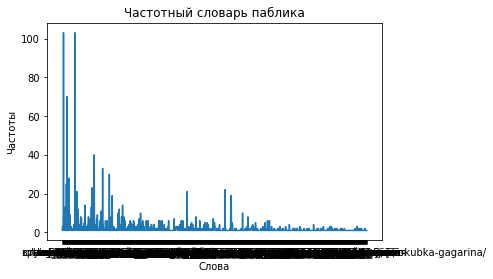

In [7]:
textcorpus = []
postlist = []
thread = []
commentlist = []
forum = []
allcommentlist = []
avlengthes = []
winter = []
spring = []
summer = []
autumn = []
seasonav = []
seasons = ["зима", "весна", "лето", "осень"]
night = []
morning = []
noon = []
evening = []
periodav = []
periods = ["ночь", "утро", "день", "вечер"]
freqdict = {}
endpoint = "api.vk.com/method"
access_token = "baf02fa1baf02fa1baf02fa1a8ba99ed07bbaf0baf02fa1e6585d322cf3fead2ee5da11"
startpoint = 0
url_post = "https://{endpoint}/{method}?domain=hc_avangardomsk&count=100&v=5.95&access_token={token}&offset={offset}".format(
endpoint=endpoint, method="wall.get", token=access_token, offset=startpoint)
result_post = requests.get(url_post).json()
count = result_post['response']['count']
for post in result_post['response']['items']:
    post_id = post['id']
    owner_id = post['owner_id']
    from_id = post['from_id']
    postcore = post['text']
    ts = int(post['date'])
    greenwich = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    params = greenwich.split()
    date = params[0]
    dparams = date.split("-")
    time = params[1]
    tparams = time.split(":")
    month = dparams[1]
    hour = tparams [0]
    volume = len(postcore)
    if int(month) < 3 or int(month) == 12:
        winter.append(volume)
    elif int(month) < 6:
        spring.append(volume)
    elif int(month) < 9:
        summer.append(volume)
    else:
        autumn.append(volume)
    if int(hour) < 5 or int(hour) == 23:
        night.append(volume)
    elif int(hour) < 11:
        morning.append(volume)
    elif int(hour) < 17:
        noon.append(volume)
    else:
        evening.append(volume)
    words = postcore.split()
    words_clean = [word.lower().strip(",.!?;:«»()#%0123456789-_") for word in words]
    for lexeme in words_clean:
        if lexeme in freqdict:
            freqdict[lexeme] = freqdict[lexeme] + 1
        else:
            freqdict[lexeme] = 1
    thread = []
    lethread = []
    commentlist = []
    startpoint = 0
    url_comment = "https://{endpoint}/{method}?owner_id=-42405053&post_id={post_id}&count=100&v=5.95&access_token={token}&offset={offset}".format(
    endpoint=endpoint, method="wall.getComments", post_id=post_id, token=access_token, offset=startpoint)
    result_comment = requests.get(url_comment).json()
    count = result_comment["response"]['count']
    for comment in result_comment['response']['items']:
        comment_id = comment['id']
        try:
            from_id = comment['from_id'] 
            commentcore = comment['text']
        except:
            from_id = 0
            commentcore = "Комментарий удалён"
        thread.append(commentcore)
    for message in thread:
        length = len(message)
        lethread.append(length)
    comlength = sum(lethread)
    if len(thread) > 0:
        avlength = comlength/len(thread)
    else:
        avlength = 0
    avlengthes.append(avlength)
    textcorpus.append(postcore)
    postlist.append(post)
    forum.append(thread)
    allcommentlist.append(commentlist)
winsum = sum(winter)
if len(winter) > 0:
    winav = winsum/len(winter)
else:
    winav = 0
seasonav.append(winav)
spsum = sum(spring)
if len(spring) > 0:
    spav = spsum/len(spring)
else:
    spav = 0
seasonav.append(spav)
sumsum = sum(summer)
if len(summer) > 0:
    sumav = sumsum/len(summer)
else:
    sumav = 0
seasonav.append(sumav)
autsum = sum(autumn)
if len(autumn) > 0:
    autav = autsum/len(autummn)
else:
    autav = 0
seasonav.append(autav)
nisum = sum(night)
niav = nisum/len(night)
periodav.append(niav)
mosum = sum(morning)
moav = mosum/len(morning)
periodav.append(moav)
noonsum = sum(noon)
noonav = noonsum/len(noon)
periodav.append(noonav)
evesum = sum(evening)
eveav = evesum/len(evening)
periodav.append(eveav)
purecorp = dict(zip(textcorpus, forum))
with open("purecorp_Tarasov.csv", 'w', encoding="utf-8") as f1:
    for purenote in purecorp.keys():
        f1.write(purenote + "," + str(purecorp[purenote]) + "/n")
with open("posts_Tarasov.csv", 'w', encoding = "utf-8") as f2:
    for element in postlist:
        f2.write(str(element) + "/n")
with open("fullcomms_Tarasov.csv", 'w', encoding = "utf-8") as f3:
    for sublist in allcommentlist:
        f3.write(str(sublist) + "/n")
numbers = list(range(1, 101))
lexicon = freqdict.keys()
freqs = [freqdict[i] for i in lexicon]
plt.plot(lexicon, freqs)
plt.title("Частотный словарь паблика")
plt.xlabel("Слова")
plt.ylabel("Частоты")
plt.show()